Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Plots have been generated and saved as PNG files.


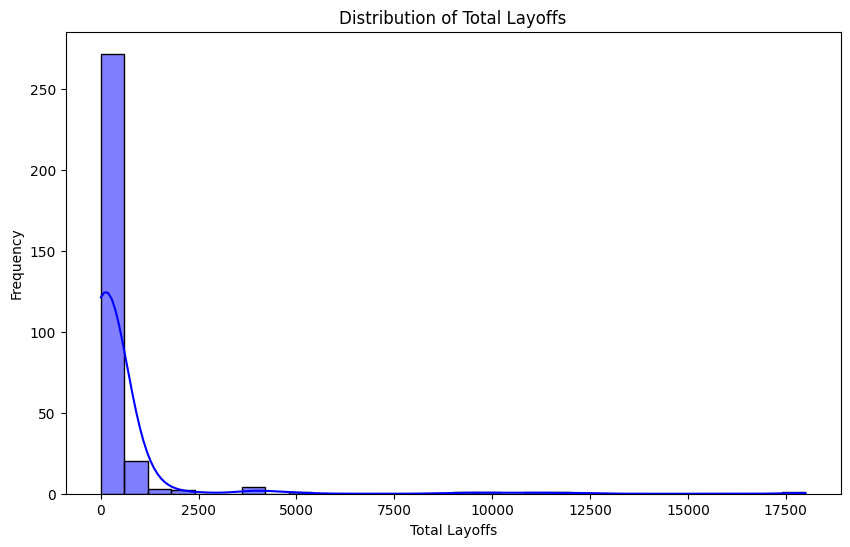

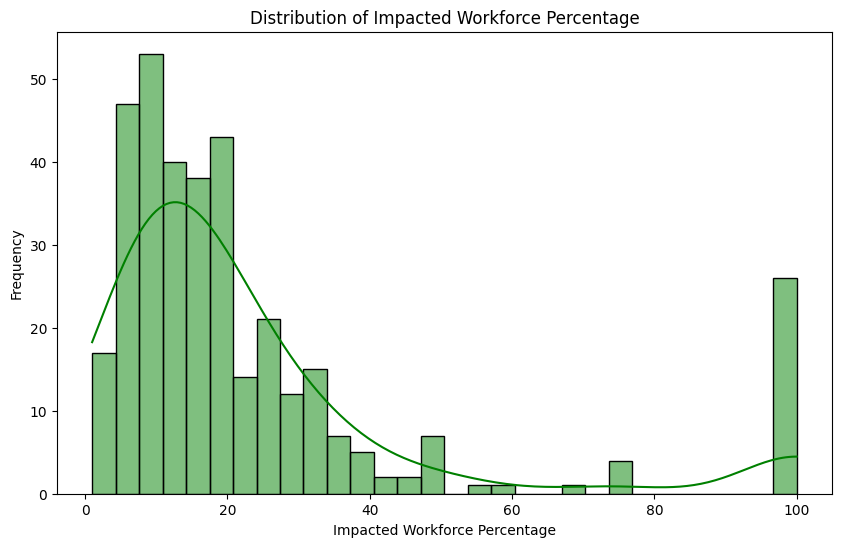

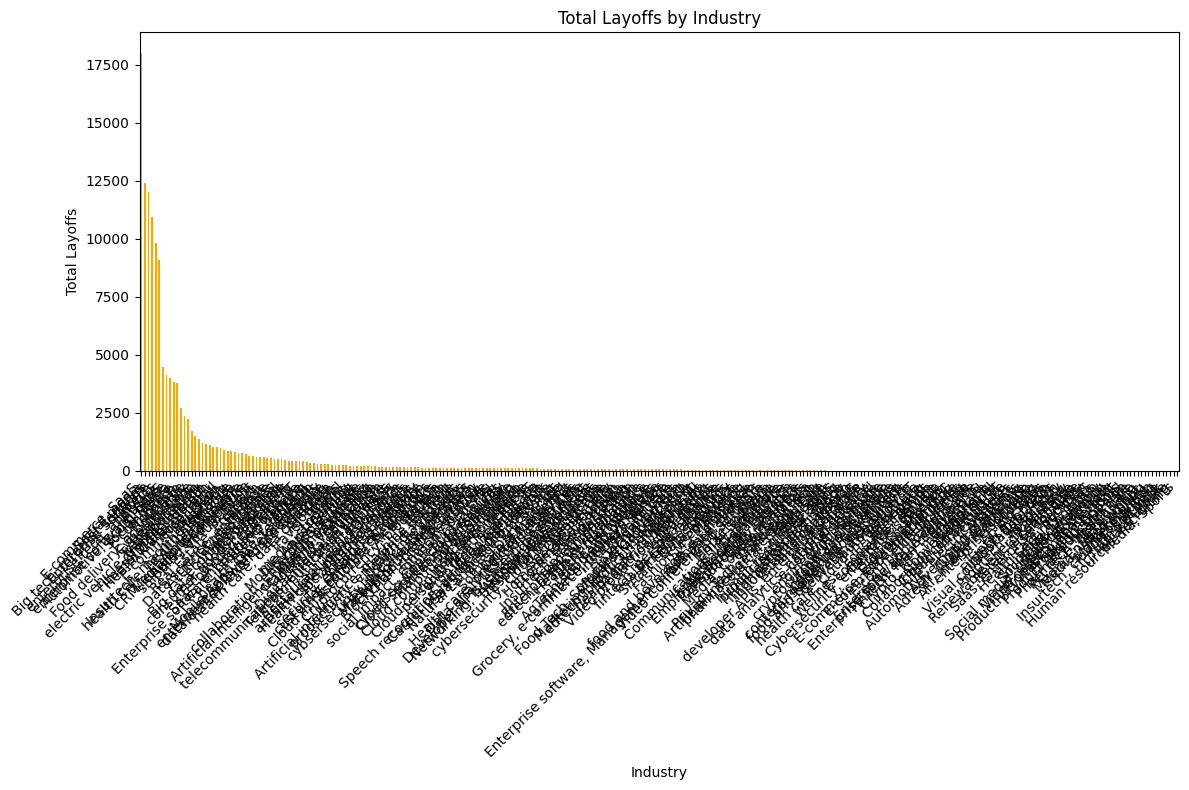

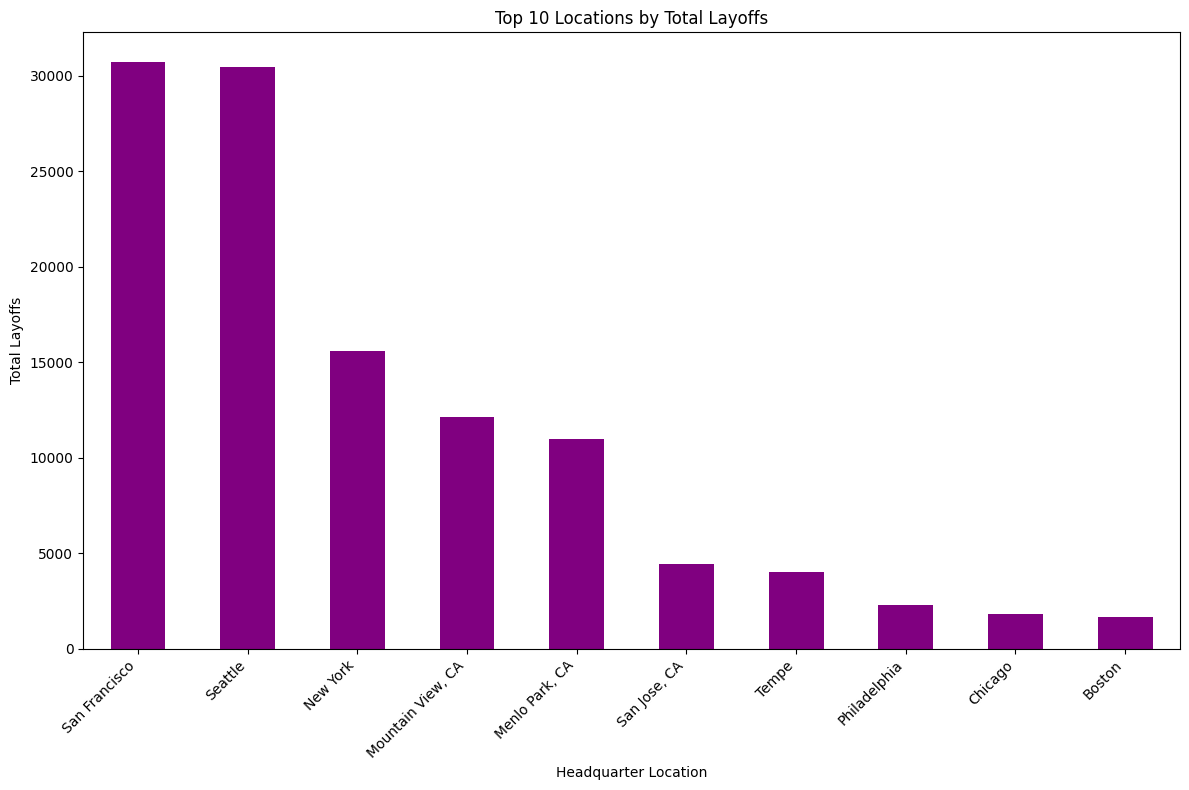

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Đường dẫn tới file trong Google Drive
file_path = '/content/drive/My Drive/dataset_cho_python2.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

# Ensure numeric columns are correctly formatted
numeric_columns = ['total_layoffs', 'impacted_workforce_percentage']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].str.replace(',', '').str.replace('%', ''), errors='coerce')

# Function to generate and save plots
def generate_plots(data):
    # Plot 1: Distribution of layoffs
    plt.figure(figsize=(10, 6))
    sns.histplot(data['total_layoffs'].dropna(), bins=30, kde=True, color='blue')
    plt.title('Distribution of Total Layoffs')
    plt.xlabel('Total Layoffs')
    plt.ylabel('Frequency')
    plt.savefig('total_layoffs_distribution.png')

    # Plot 2: Impacted workforce percentage distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data['impacted_workforce_percentage'].dropna(), bins=30, kde=True, color='green')
    plt.title('Distribution of Impacted Workforce Percentage')
    plt.xlabel('Impacted Workforce Percentage')
    plt.ylabel('Frequency')
    plt.savefig('impacted_workforce_distribution.png')

    # Plot 3: Layoffs by industry
    plt.figure(figsize=(12, 8))
    industry_layoffs = data.groupby('industry')['total_layoffs'].sum().sort_values(ascending=False)
    industry_layoffs.plot(kind='bar', color='orange')
    plt.title('Total Layoffs by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Total Layoffs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('layoffs_by_industry.png')

    # Plot 4: Layoffs by headquarters location
    plt.figure(figsize=(12, 8))
    location_layoffs = data.groupby('headquarter_location')['total_layoffs'].sum().sort_values(ascending=False).head(10)
    location_layoffs.plot(kind='bar', color='purple')
    plt.title('Top 10 Locations by Total Layoffs')
    plt.xlabel('Headquarter Location')
    plt.ylabel('Total Layoffs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('layoffs_by_location.png')

# Generate the plots
generate_plots(data)

print("Plots have been generated and saved as PNG files.")

